In [11]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [12]:
im =  cv2.imread('elephant.jpg') #Reads an image into BGR Format

im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)

(330, 500, 3)


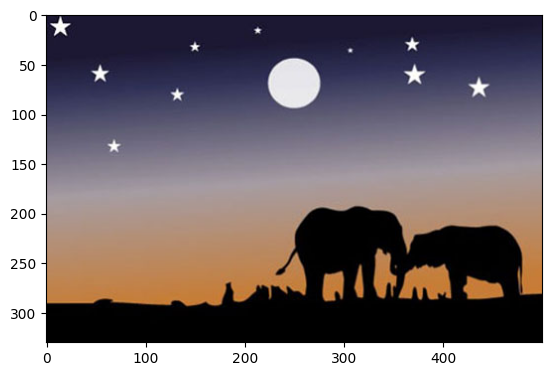

In [13]:
plt.imshow(im) # as RGB Format
plt.show()

In [14]:
# Flatten Each channel of the Image
all_pixels  = im.reshape((-1,3))
print(all_pixels.shape)

(165000, 3)


In [15]:
from sklearn.cluster import KMeans

In [16]:
dominant_colors = 4

km = KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

KMeans(n_clusters=4)

In [17]:
centers = km.cluster_centers_

In [18]:
centers = np.array(centers,dtype='uint8')

In [19]:
print(centers)

[[175 145 128]
 [ 38  35  65]
 [  1   0   1]
 [100  96 118]]


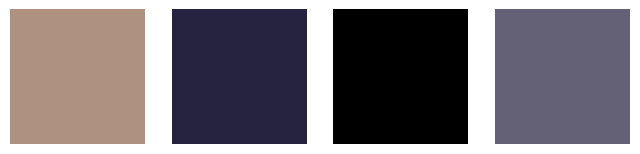

In [20]:
i = 1

plt.figure(0,figsize=(8,2))


colors = []

for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_col)
    
    #Color Swatch
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
    
plt.show()

In [21]:
new_img = np.zeros((330*500,3),dtype='uint8')

print(new_img.shape)

(165000, 3)


In [22]:
colors

[array([175, 145, 128], dtype=uint8),
 array([38, 35, 65], dtype=uint8),
 array([1, 0, 1], dtype=uint8),
 array([100,  96, 118], dtype=uint8)]

In [23]:
km.labels_

array([1, 1, 1, ..., 2, 2, 2])

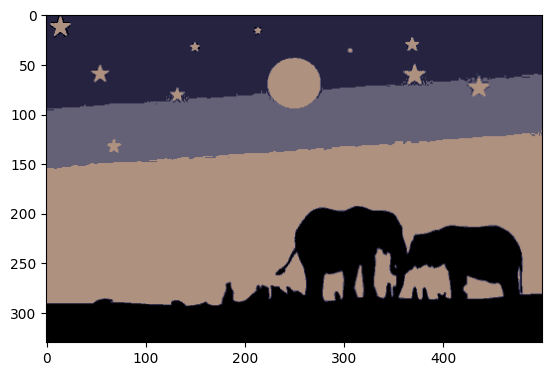

In [24]:
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]
    
new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()